# pandas

References
- [Pandas API](https://pandas.pydata.org/docs/reference/)
- [Pandas Lexicon](https://github.com/anitacheung/alpha/blob/ff84e550b94634b5243878a03457713c37a8ad8a/python/lexicon-pandas.csv)

In [2]:
import pandas as pd
import seaborn as sns
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt 

## Pandas Introduction
- Wrapper for numpy (therefore maintains functionality of numpy)
- Methods: df.method()
- Functions: pd.function(df)

## Get Data

### From CSV

In [3]:
symbol='test'
start = '2021-01-01'
end = '2021-02-01'
dates= pd.date_range(start, end)
try:
    df = pd.read_csv('data/{}.csv'.format(symbol),   # file not available, serve as example only
                        index_col=dates, 
                        parse_dates=True,
                        usecols=['Date', 'Adj Close'],
                        na_values=['nan'],
                        dtype=str,
                        header=0,
                        skiprows=1,
                        )
except:
    pass

### From Excel

In [ ]:
try:
    df = pd.read_excel('data/{}.csv'.format(symbol),   # file not available, serve as example only
                        sheet_name='sheet1',
                        header=None,
                        index_col=False,
                        )
except:
    pass

## Data Slicing

### By Position

In [4]:
df = sns.load_dataset('mpg')

df_top = df.head(10)
df_bot = df.tail(10)

### By Date
Tags: <a name="Reading_CSV_data_into_Pandas">Reading CSV data into pandas</a>, <a name="Filtering_to_specific_dates">Filtering to specific dates</a>, <a name="Date_slicing">Date slicing</a>, <a name="Symbol_slicing">Symbol slicing</a>

- Filtering via joining data is faster than through booleans: [code](https://github.com/anitacheung/alpha/blob/9164592c1db3e050d0e720fd1aff5bf7f871272c/python/pandas-timing.py)

In [5]:
sd = dt.datetime(2021,1,1)
ed = dt.datetime(2022,1,1)
apple = yf.Ticker('aapl').history(start=sd, end=ed)
google = yf.Ticker('goog').history(start=sd, end=ed)

df = apple.join(google, lsuffix='_Apple', rsuffix='_Google')

# Specific Day
df_slice = df[df.index == dt.datetime(2021,6,1)]

# Date Range: Option 1
start = dt.datetime(2021,1,1)
end = dt.datetime(2021,2,1)
dates= pd.date_range(start, end)                
df_range = pd.DataFrame(index=dates)
df_subset1 = df_range.join(df)

# Date Range: Option 2 - may have missing data
df_abbrev = df[['Close_Apple', 'Close_Google']].rename(columns={'Close_Apple':'AAPL', 'Close_Google':'GOOG'})
df_subset2 = df_abbrev[['AAPL']][start:end]

# Date Range: Option 3 (Deprecated) - may have missing data
# df_subset3 = df.ix[start:end, 'AAPL':'GOOG']       

# Date Range: Option 4 - may have missing data
df_subset4 = df_abbrev[['AAPL']].loc[start:end]

# Date Range: Option 5 - may have missing data
df_subset5 = df_abbrev[['AAPL']].iloc[:31]

### Querying Data

In [ ]:
df = sns.load_dataset('iris')
df['filtered'] = df['sepal_width'].map(lambda x: x * 100).where(df['species'].str.contains('v'), 0)

## Cleaning data
Tags: <a name="ffill_bfill">Forward and Backward Fill</a>

- Copy and then set values to 0 is faster than creating a new zero array; copy is an array of pointers until the values diverge

In [6]:
df = df_subset5
df.fillna(method='ffill', inplace=True)                  # forward fill na
df.ffill()                                               # forward fill na
df.fillna(method='bfill', inplace=True)                  # backfill na
df.bfill()                                               # backfill na
df.dropna(subset=['AAPL'], inplace=True)                 # drop na
df = df.rename(columns={'AAPL':'aapl'})                  # rename columns
df2 = df.copy(deep=True)                                 # copies df

## Operations

- Pandas will perform element wise based on index unless the underlying numpy array is pulled out

In [7]:
df = df[1:] + df[:-1].values
df = df * 2                      # multiples each element
df = df / 2                      # divides each element

## Statistics
Tags: <a name="Gross_statics_on_dataframes">Gross statistics on dataframes</a>, <a name="Correlation">Correlation</a>

In [8]:
ticker = 'aapl'
max_close = df[ticker].max()               # max
min_close = df[ticker].min()               # min
mean_volume = df[ticker].mean()           # mean
median_volume = df[ticker].median()       # median
std = df[ticker].std()                           # std
corr = df.corr(method='pearson')                   # correlation  

## Technical Indicators
Tags: <a name="Rolling_statistics_on_dataframes">Rolling statistics on dataframes</a>, <a name="Plotting_a_technical_indicator_(Bollinger_Bands)">Plotting a technical indicator (Bollinger Bands)</a>

In [9]:
ticker = 'aapl'
num_days = 15
rm_df = df[ticker].rolling(window=num_days).mean()            # 1. Rolling mean
rstd_df = df[ticker].rolling(window=num_days).std()           # 2. Rolling std
uband_df = rm_df + (2 * rstd_df)                              # 3. Upper and lower bands
lband_df = rm_df - (2 * rstd_df)  
rmax_df = df[ticker].rolling(window=num_days).max()           # Rolling max
rmin_df = df[ticker].rolling(window=num_days).min()           # Rolling min   

## Plotting Dataframes
Tags: <a name="Plotting">Plotting</a>, <a name="Normalizing">Normalizing</a>

- Plotting dataframes

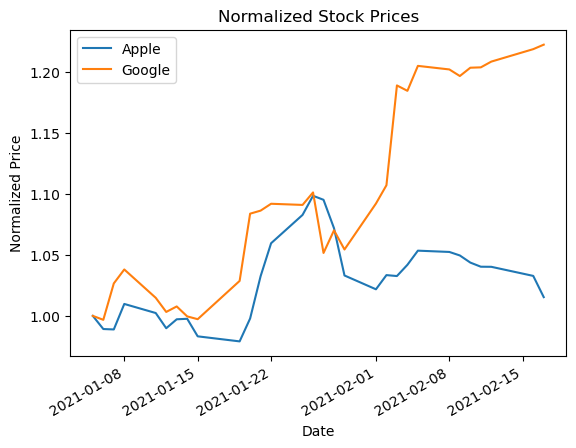

In [10]:
ticker = 'aapl'
df2 = yf.Ticker('GOOG').history(start=sd,end=ed)['Close']
df2 = df.join(df2)['Close'].rename('GOOG')
df2 = df2.ffill().bfill()
df = df/df.iloc[0]
df2 = df2/df2.iloc[0]

ax = df[ticker].plot(title='title', label='Apple')  # Method 1 of plotting
df2.plot(label='Google', ax=ax)                     # Method 2 of plotting
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price')
ax.legend(loc='upper left')
plt.title('Normalized Stock Prices')
plt.show()
print()

### Histograms
Tags: <a name="Histogram_of_daily_returns">Histogram of daily returns</a>

- Important Features: mean, standard deviation, kurtosis 

In [11]:
ticker1 = 'GOOG'
ticker2 = 'aapl'
num_bins = 10
df[ticker1].hist(bins=num_bins, label=ticker1)                      # Plot as histogram
df[ticker2].hist(bins=num_bins, label=ticker2)
plt.axvline(df[ticker1].mean(), color='b', linestyle='dashed', linewidth=2)  # Plot mean line
plt.axvline(df[ticker1].mean()-df[ticker1].std(), color='b', linestyle='dashed', linewidth=2)  # Plot std lines
plt.axvline(df[ticker1].mean()+df[ticker1].std(), color='b', linestyle='dashed', linewidth=2)
plt.text(0.1, 0.1, df[ticker1].kurtosis(), transform=ax.transAxes)                                       # Annotate with kurtosis value
plt.legend(loc='upper left')
plt.show()
print()

KeyError: 'GOOG'

## Scatter Plots
Tags: <a name="Scatter_plots">Scatter plots</a>

In [ ]:
import numpy as np

def plot_data(df):
    df[['Adj Close', 'Close']].plot()  # Assumes date is already set as index
    plt.show()

def compare_stocks(df):
    df.plot(kind='scatter', x=ticker1, y=ticker2)
    beta, alpha = np.polyfit(df[ticker1], df[ticker2], 1)               # See numpy
    plt.plot(df[ticker1], beta * df[ticker1] + alpha, '-', color='r')   # ticker1 is on x
    plt.show()

## Merging data
Tags: <a name="Reading_data_for_multiple_stocks_into_the_structure">Reading data for multiple stocks into the structure</a>

In [ ]:
# Variables
df = sns.load_dataset('tips')
df[['total_bill', 'size']] = df[['total_bill', 'size']].astype('int')
df2 = (df[['total_bill','size']]/2).astype('int')

# Formula
df_join = df.join(df2, rsuffix='_halved')
df_merge = df.merge(df2, left_on='size', right_on='size', suffixes=('', '_halved'))
df_concat = pd.concat([df, df2], axis=1)

## Data Manipulation

In [15]:
df = yf.Ticker('aapl').history()
df = df.shift(1)                                                                    # shifts index assignment down by one (leaves offset values as NaNs)
df.reset_index(inplace=True)                                                        # remove index and change to a column
df['Volume_str'] = df['Volume'].astype('str')                                       # change type of string
df['Volume_str'] = df['Volume_str'].str.lower()                                     # converts to string
df['Volume_str'] = df['Volume_str'].replace(['82391400.0'], ['a'])                  # Replace value in string column
df['Date_copy'] = pd.to_datetime(df['Date'], errors='coerce')                       # converts to datetime
df['Date_str'] = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')                         # converts from string to time
df = df.sort_values(by='Volume_str', ascending=False)                               # sort reverse order
df.dropna(subset=['Close'], inplace=True)                                           # Drop missing data
df.drop(['Volume'], axis=1, inplace=True)                                           # Drops column

print(df.head())

         Date        Open        High         Low       Close  Dividends  \
17 2022-02-07  171.679993  174.100006  170.679993  172.389999       0.22   
5  2022-01-20  169.783686  170.862313  165.728854  166.018478       0.00   
6  2022-01-21  166.767517  169.464079  163.971077  164.300659       0.00   
4  2022-01-19  171.291754  172.320442  169.194435  169.583939       0.00   
21 2022-02-11  174.139999  175.479996  171.550003  172.119995       0.00   

    Stock Splits  Volume_str  Date_copy   Date_str  
17           0.0           a 2022-02-07 2021-01-01  
5            0.0  94815000.0 2022-01-20 2021-01-01  
6            0.0  91420500.0 2022-01-21 2021-01-01  
4            0.0  90956700.0 2022-01-19 2021-01-01  
21           0.0  90865900.0 2022-02-11 2021-01-01  


## Data Reshape

In [ ]:
df = sns.load_dataset('anscombe')

# Wide to long format
df_melt = pd.melt(df, 
                value_vars=df.columns[1], 
                ignore_index=False)
print(df_melt.head())
print()

# Reshape into new rows and columns
df_pivot = pd.pivot(data=df.drop_duplicates(subset=['dataset', 'x'], keep='first'), 
            index='dataset', 
            columns='x', 
            values='y')
print(df_pivot.head())
print()

# Group by values
df_grouped = df.groupby(['dataset'], as_index=False).agg({'dataset':'first', 'x':'mean', 'y':'std'})
print(df_grouped.head())
print()

  variable  value
0        x   10.0
1        x    8.0
2        x   13.0
3        x    9.0
4        x   11.0

x        4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0   12.0   13.0  14.0  \
dataset                                                                       
I        4.26  5.68  7.24  4.82  6.95  8.81  8.04  8.33  10.84   7.58  9.96   
II       3.10  4.74  6.13  7.26  8.14  8.77  9.14  9.26   9.13   8.74  8.10   
III      5.39  5.73  6.08  6.42  6.77  7.11  7.46  7.81   8.15  12.74  8.84   
IV        NaN   NaN   NaN   NaN  6.58   NaN   NaN   NaN    NaN    NaN   NaN   

x        19.0  
dataset        
I         NaN  
II        NaN  
III       NaN  
IV       12.5  

  dataset    x         y
0       I  9.0  2.031568
1      II  9.0  2.031657
2     III  9.0  2.030424
3      IV  9.0  2.030579

